<a href="https://colab.research.google.com/github/Aashutosh-Basnet/Aashutosh-Basnet/blob/main/Using_library/nn_iris_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print("Describing the data: ", df.describe())

Describing the data:         sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [5]:
print("Info of the data: ", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
Info of the data:  None


In [8]:
print("last 10 samples of the data: ", df.tail(10))

last 10 samples of the data:       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
140                6.7               3.1                5.6               2.4
141                6.9               3.1                5.1               2.3
142                5.8               2.7                5.1               1.9
143                6.8               3.2                5.9               2.3
144                6.7               3.3                5.7               2.5
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [11]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


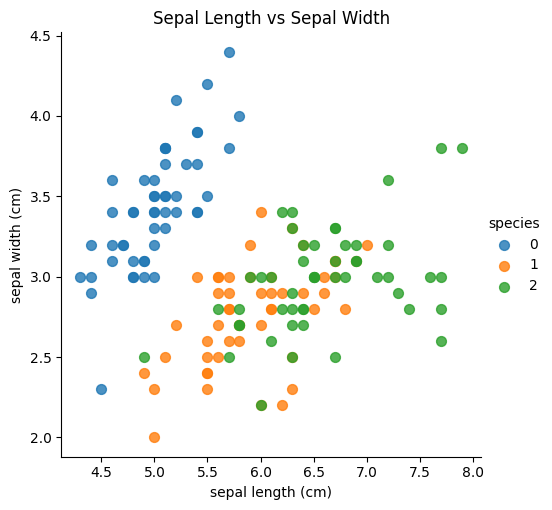

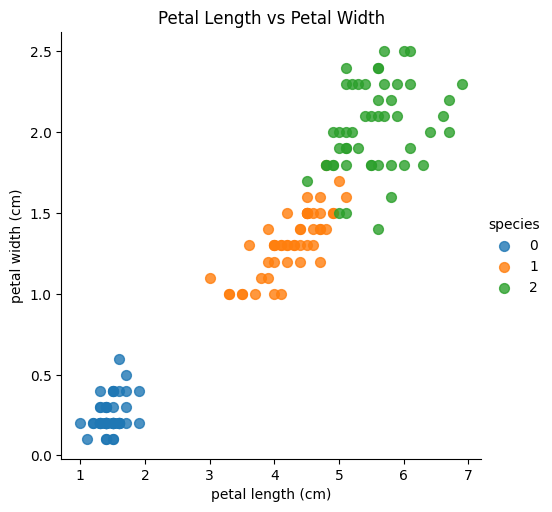

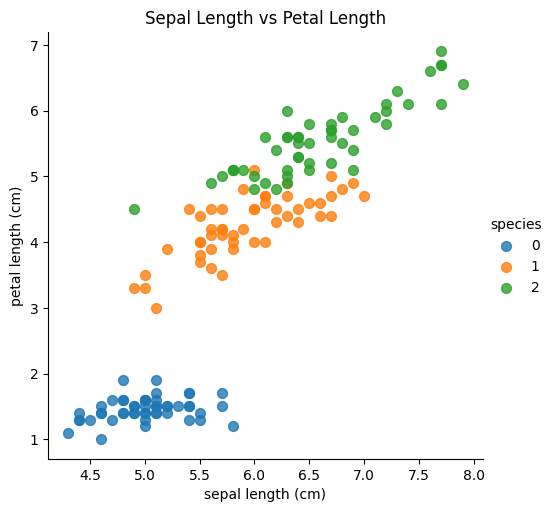

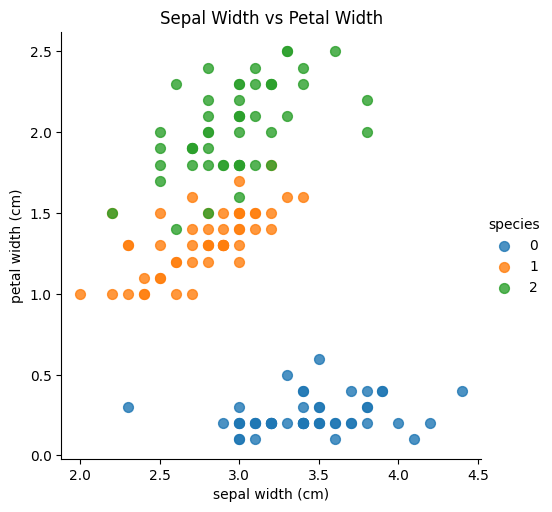

In [20]:
columns = [
    ('sepal length (cm)', 'sepal width (cm)', 'Sepal Length vs Sepal Width'),
    ('petal length (cm)', 'petal width (cm)', 'Petal Length vs Petal Width'),
    ('sepal length (cm)', 'petal length (cm)', 'Sepal Length vs Petal Length'),
    ('sepal width (cm)', 'petal width (cm)', 'Sepal Width vs Petal Width')
]

for x, y, title in columns:
    lm = sns.lmplot(x=x, y=y,  # Specify x and y explicitly
                    data=df,   # Ensure data is passed correctly
                    fit_reg=False,
                    hue="species",
                    scatter_kws={"marker": "D", "s": 50})
    lm.ax.set_title(title)  # Set title for the plot

plt.show()


In [39]:
X=df.iloc[:,1:5].values
y=df.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[3.5 1.4 0.2 0. ]
 [3.  1.4 0.2 0. ]
 [3.2 1.3 0.2 0. ]]
Examples of y
 [0 0 0]


In [40]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.09254209 0.02754801 0.01150242 0.        ]
 [0.07932179 0.02754801 0.01150242 0.        ]
 [0.08460991 0.02558029 0.01150242 0.        ]]


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

In [43]:
X_train.shape

(120, 4)

In [44]:
y_train.shape

(120,)

In [45]:
#Neural network module
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical


In [46]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [47]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1000)                │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
X_train.shape

(120, 4)

In [50]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3904 - loss: 1.0833 - val_accuracy: 0.5667 - val_loss: 1.0484
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6511 - loss: 0.9910 - val_accuracy: 0.5667 - val_loss: 0.9209
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6842 - loss: 0.8160 - val_accuracy: 0.5667 - val_loss: 0.7202
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7080 - loss: 0.5511 - val_accuracy: 0.7667 - val_loss: 0.4515
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9219 - loss: 0.2848 - val_accuracy: 1.0000 - val_loss: 0.2321
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.2166 - val_accuracy: 1.0000 - val_loss: 0.1429
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.1128 - val_accuracy: 1.0000 - val_loss: 0.0506
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0457 - val_accuracy: 1.0000 - val_loss: 0.0269


In [51]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dataset",accuracy )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Accuracy of the dataset 100.0
